In [81]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# sns.set_style("darkgrid")


# Study of the parallel program's effectiveness

### STARS 1

In [82]:
stars_times_1 = pd.read_csv('./times1.csv', header=0)
stars_times_1.head()

,z_n,n,i,p,t
0,1000,1000,1,1,7.241556
1,1000,1000,1,2,3.920598
2,1000,1000,1,3,4.577941
3,1000,1000,1,4,4.000870
4,1000,1000,1,5,4.155683


Intel© Core™ i5-7200U CPU @ 2.50GHz × 2

constant problem size

## Calculations

In [83]:
ile_p = stars_times_1.groupby(["z_n"], as_index= False).max()['p'][0]
s = stars_times_1.groupby(["z_n","p"], as_index= False).mean()
s['t_1p'] = 0
s['t_1p'][0:ile_p] = s['t'][0]
s['t_1p'][ile_p:ile_p*2] = s['t'][ile_p]
s['t_1p'][ile_p*2:ile_p*3] = s['t'][ile_p*2]
s['speedup'] = s['t_1p']/s['t']
s['effectiveness'] = s['speedup']/s['p']
s

/home/micha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/micha/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/micha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

,z_n,p,n,i,t,t_1p,speedup,effectiveness
0,500,1,500,1,2.287042,2.287042,1.000000,1.000000
1,500,2,500,1,1.238463,2.287042,1.846678,0.923339
2,500,3,500,1,1.315593,2.287042,1.738411,0.579470
3,500,4,500,1,1.336566,2.287042,1.711133,0.427783
4,500,5,500,1,1.556703,2.287042,1.469157,0.293831
5,500,6,500,1,1.523221,2.287042,1.501451,0.250242
6,500,7,500,1,1.689420,2.287042,1.353744,0.193392
7,500,8,500,1,1.736536,2.287042,1.317014,0.164627
8,1000,1,1000,1,7.241556,7.241556,1.000000,1.000000
9,1000,2,1000,1,3.920598,7.241556,1.847054,0.923527


# Plots
points connected with lines were used for the charts

the points show accurate results, and the connecting lines allow easier observation of trends

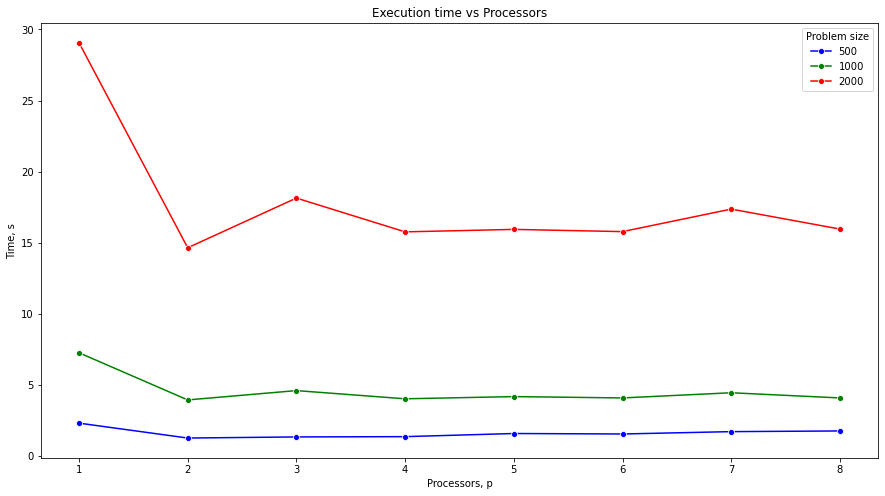

In [84]:
g = sns.lineplot(x="p", y="t", style="z_n", hue="z_n", palette=["blue","green","red"], marker="o", dashes=False, data=s)
g.set_title("Execution time vs Processors")
g.set(xlabel='Processors, p', ylabel='Time, s')
plt.legend(title='Problem size', labels=['500', '1000', '2000'])
g.figure.set_size_inches(15, 8)

because the size of the task is constant and the number of processors increases, the calculation time decreases

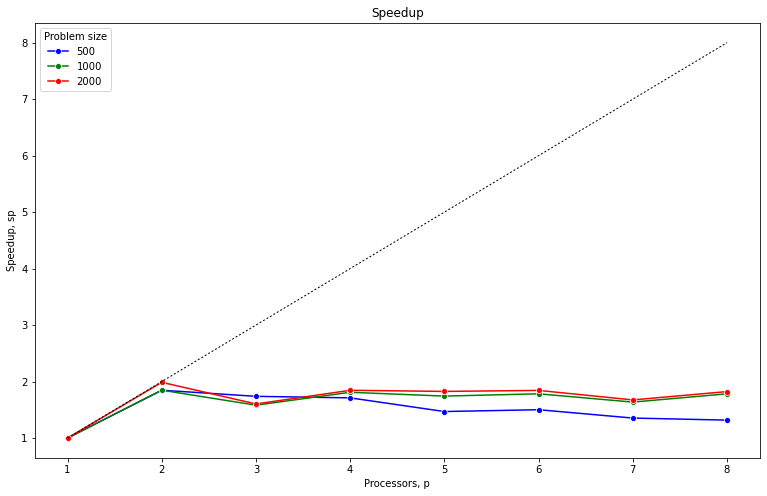

In [85]:
g = sns.lineplot(x="p", y="speedup", hue="z_n", palette=["blue","green","red"], marker="o", dashes=False, data=s)
g.plot([1, 8], [1, 8], 'k-', lw=1,dashes=[2, 2])
g.set_title("Speedup")
g.set(xlabel='Processors, p', ylabel='Speedup, sp')
plt.legend(title='Problem size', labels=['500', '1000', '2000'])
g.figure.set_size_inches(13, 8)

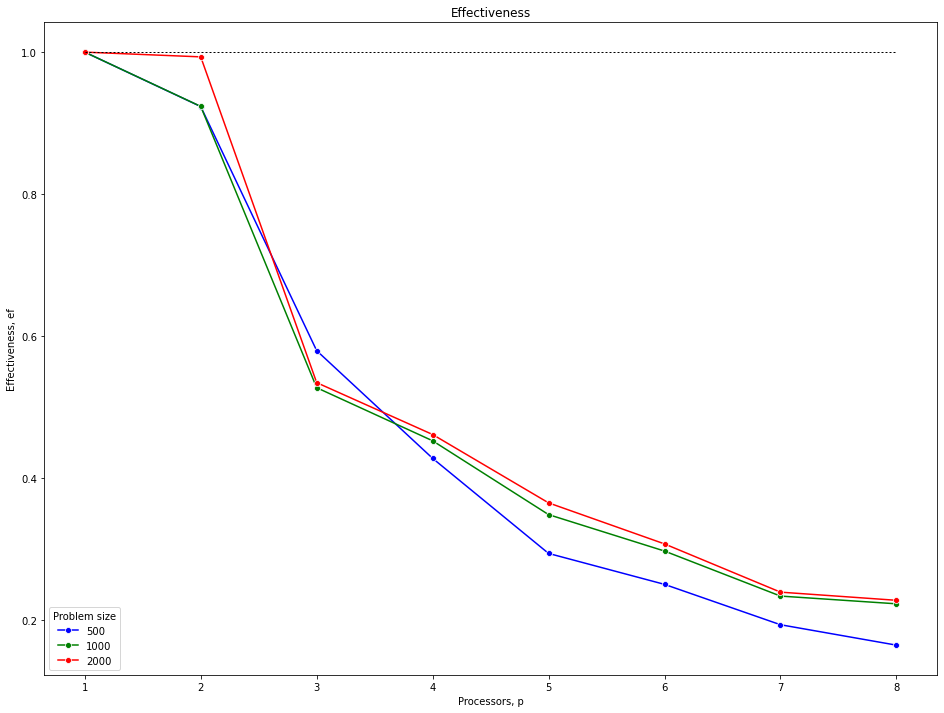

In [86]:
g = sns.lineplot(x="p", y="effectiveness", hue="z_n", palette=["blue","green","red"], marker="o", dashes=False, data=s)
g.set_title("Effectiveness")
g.set(xlabel='Processors, p', ylabel='Effectiveness, ef')
plt.legend(title='Problem size', labels=['500', '1000', '2000'])
g.plot([1, 8], [1, 1], 'k-', lw=1,dashes=[2, 2])
g.figure.set_size_inches(16, 12)


### STARS 2

In [87]:
stars_times_2 = pd.read_csv('./times2.csv', header=0)
stars_times_2.head()

,z_n,n,i,p,t
0,500,500,1,1,1.833047
1,500,500,1,2,1.388374
2,500,500,1,4,1.181554
3,500,500,1,6,1.446185
4,500,500,1,8,1.238290


Intel© Core™ i5-7200U CPU @ 2.50GHz × 2

constant problem size

## Calculations

In [88]:
ile_p = stars_times_2.groupby(["z_n"], as_index= False).max()['p'][0]
s = stars_times_2.groupby(["z_n","p"], as_index= False).mean()
s['t_1p'] = 0
s['t_1p'][0:ile_p] = s['t'][0]
# s['t_1p'][ile_p:ile_p*2] = s['t'][ile_p]
# s['t_1p'][ile_p*2:ile_p*3] = s['t'][ile_p*2]
s['speedup'] = s['t_1p']/s['t']
s['effectiveness'] = s['speedup']/s['p']
s

/home/micha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/micha/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,z_n,p,n,i,t,t_1p,speedup,effectiveness
0,500,1,500,1,1.833047,1.833047,1.000000,1.000000
1,500,2,500,1,1.388374,1.833047,1.320283,0.660142
2,500,4,500,1,1.181554,1.833047,1.551386,0.387846
3,500,6,500,1,1.446185,1.833047,1.267505,0.211251
4,500,8,500,1,1.238290,1.833047,1.480305,0.185038


# Plots
points connected with lines were used for the charts

the points show accurate results, and the connecting lines allow easier observation of trends

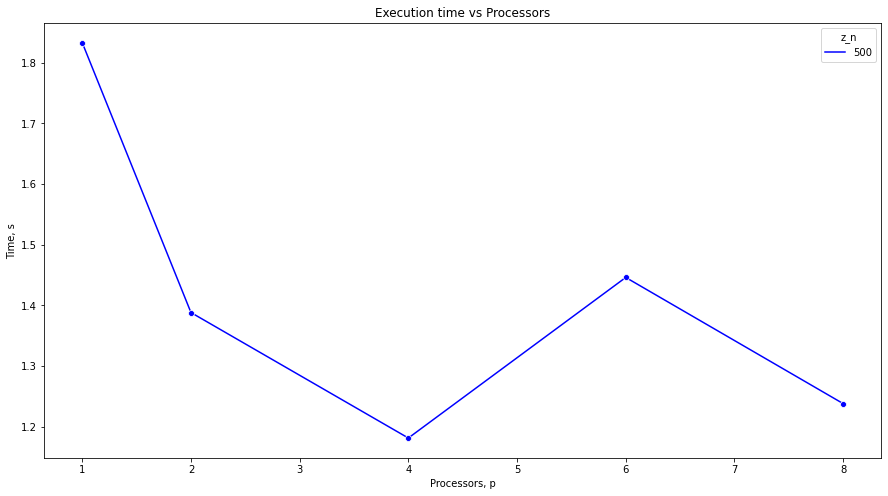

In [89]:
g = sns.lineplot(x="p", y="t", style="z_n", hue="z_n", palette=["blue"], marker="o", dashes=False, data=s)
g.set_title("Execution time vs Processors")
g.set(xlabel='Processors, p', ylabel='Time, s')
# plt.legend(title='Problem size', labels='500', '1000', '2000'])
g.figure.set_size_inches(15, 8)

because the size of the task is constant and the number of processors increases, the calculation time decreases

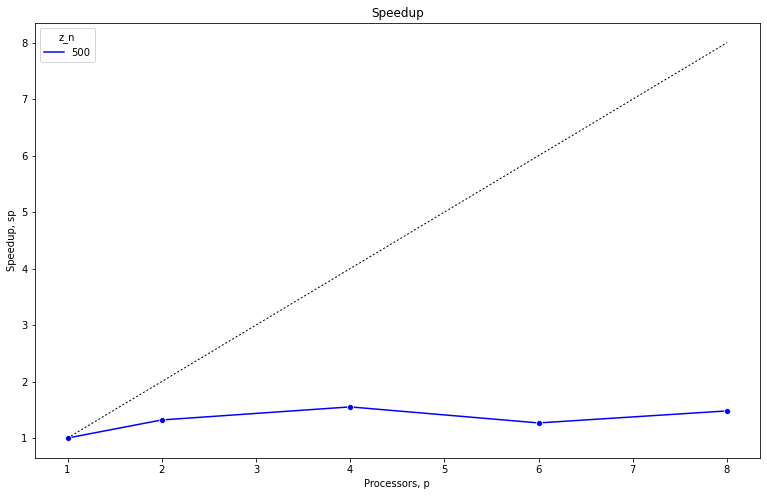

In [90]:
g = sns.lineplot(x="p", y="speedup", hue="z_n", palette=["blue"], marker="o", dashes=False, data=s)
g.plot([1, 8], [1, 8], 'k-', lw=1,dashes=[2, 2])
g.set_title("Speedup")
g.set(xlabel='Processors, p', ylabel='Speedup, sp')
# plt.legend(title='Problem size', labels=['500', '1000', '2000'])
g.figure.set_size_inches(13, 8)

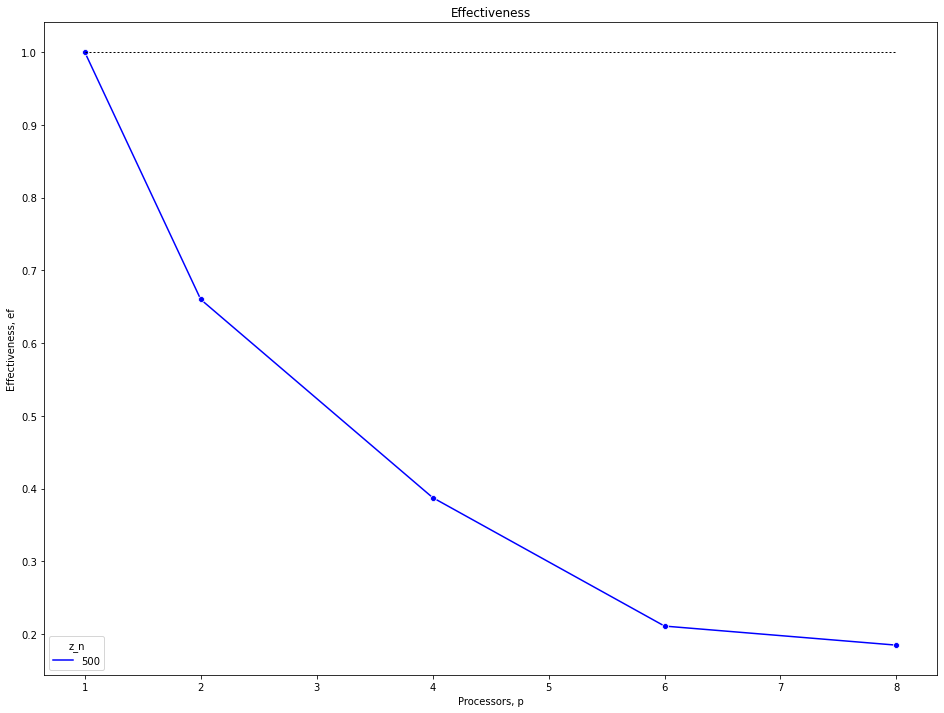

In [91]:
g = sns.lineplot(x="p", y="effectiveness", hue="z_n", palette=["blue"], marker="o", dashes=False, data=s)
g.set_title("Effectiveness")
g.set(xlabel='Processors, p', ylabel='Effectiveness, ef')
# plt.legend(title='Problem size', labels=['500', '1000', '2000'])
g.plot([1, 8], [1, 1], 'k-', lw=1,dashes=[2, 2])
g.figure.set_size_inches(16, 12)

### STARS with position calculations

In [92]:
stars_times_3 = pd.read_csv('./times3.csv', header=0)
stars_times_3.head()

,z_n,n,i,p,t
0,2000,2000,1,1,30.339779
1,2000,2000,1,2,15.299258
2,2000,2000,1,3,18.807773
3,2000,2000,1,4,15.761665
4,2000,2000,1,5,16.430629


Intel© Core™ i5-7200U CPU @ 2.50GHz × 2

constant problem size

## Calculations

In [93]:
ile_p = stars_times_3.groupby(["z_n"], as_index= False).max()['p'][0]
s = stars_times_3.groupby(["z_n","p"], as_index= False).mean()
s['t_1p'] = 0
s['t_1p'][0:ile_p] = s['t'][0]
# s['t_1p'][ile_p:ile_p*2] = s['t'][ile_p]
# s['t_1p'][ile_p*2:ile_p*3] = s['t'][ile_p*2]
s['speedup'] = s['t_1p']/s['t']
s['effectiveness'] = s['speedup']/s['p']
s

/home/micha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/micha/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,z_n,p,n,i,t,t_1p,speedup,effectiveness
0,2000,1,2000,1,30.339779,30.339779,1.000000,1.000000
1,2000,2,2000,1,15.299258,30.339779,1.983088,0.991544
2,2000,3,2000,1,18.807773,30.339779,1.613151,0.537717
3,2000,4,2000,1,15.761665,30.339779,1.924909,0.481227
4,2000,5,2000,1,16.430629,30.339779,1.846538,0.369308
5,2000,6,2000,1,15.990853,30.339779,1.897321,0.316220
6,2000,7,2000,1,16.986948,30.339779,1.786064,0.255152
7,2000,8,2000,1,16.090497,30.339779,1.885571,0.235696


# Plots
points connected with lines were used for the charts

the points show accurate results, and the connecting lines allow easier observation of trends

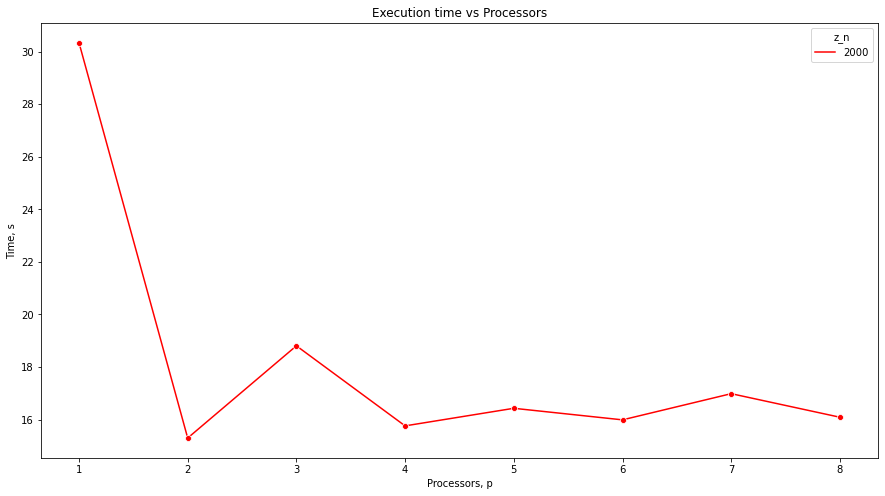

In [94]:
g = sns.lineplot(x="p", y="t", style="z_n", hue="z_n", palette=["red"], marker="o", dashes=False, data=s)
g.set_title("Execution time vs Processors")
g.set(xlabel='Processors, p', ylabel='Time, s')
# plt.legend(title='Problem size', labels=['500', '1000', '2000'])
g.figure.set_size_inches(15, 8)

because the size of the task is constant and the number of processors increases, the calculation time decreases

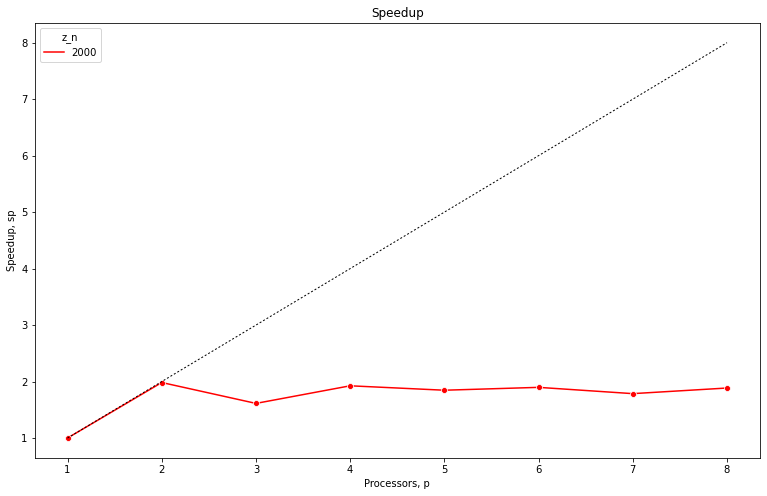

In [95]:
g = sns.lineplot(x="p", y="speedup", hue="z_n", palette=["red"], marker="o", dashes=False, data=s)
g.plot([1, 8], [1, 8], 'k-', lw=1,dashes=[2, 2])
g.set_title("Speedup")
g.set(xlabel='Processors, p', ylabel='Speedup, sp')
# plt.legend(title='Problem size', labels=['500', '1000', '2000'])
g.figure.set_size_inches(13, 8)

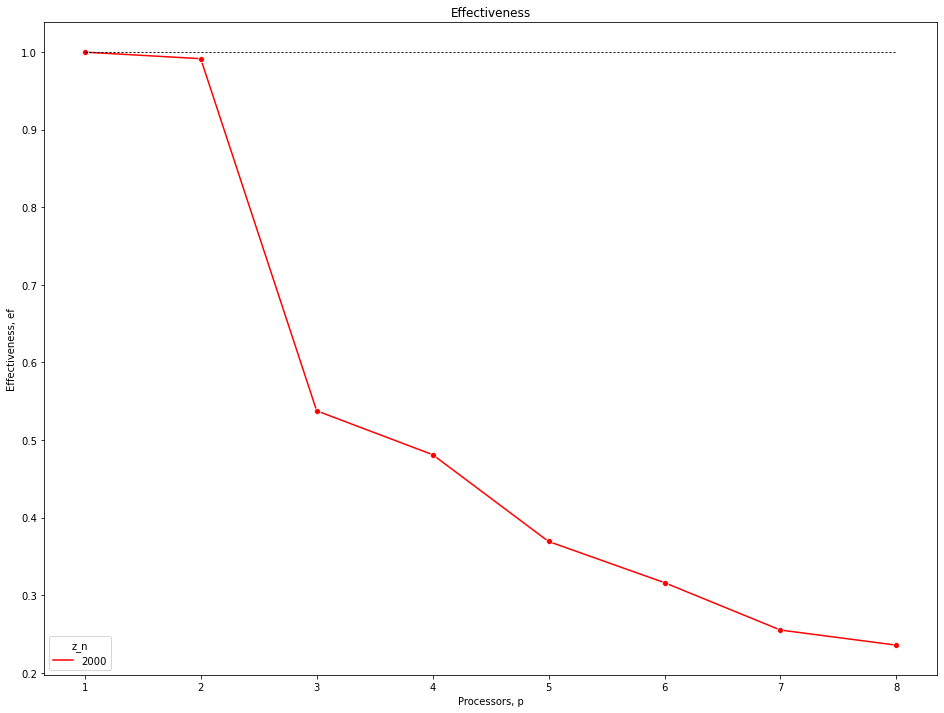

In [96]:
g = sns.lineplot(x="p", y="effectiveness", hue="z_n", palette=["red"], marker="o", dashes=False, data=s)
g.set_title("Effectiveness")
g.set(xlabel='Processors, p', ylabel='Effectiveness, ef')
# plt.legend(title='Problem size', labels=['500', '1000', '2000'])
g.plot([1, 8], [1, 1], 'k-', lw=1,dashes=[2, 2])
g.figure.set_size_inches(16, 12)
